In [41]:
%matplotlib inline
import pykat
import pylab as pl
import pandas
import matplotlib.pyplot as plt
import csv
import math
import numpy as np
pandas.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [42]:
katfile = './aLIGO_IFO_AWC_tuning_DCoff_maxtem2.kat'
basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile)
# Don't need these things so removing them
#basekat.removeLine("startnode")
#basekat.removeBlock('locks',True)
#basekat.removeBlock('ASuWFS',True)
#basekat.removeBlock('REFLWFS',True)


# Add QM noise detectors
basekat.parseCommands("""
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor

# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1

#fsig darm  ETMXHR 1 0 .5
#fsig darm2 ETMYHR 1 180 .5

sq sqz 0 0 0 nsqz

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans
qshotS   NSR_without_RP 1 $fs nOMC_AROC_trans
#qnoised noise    $fs nOMCout
#pd1     signal 1 $fs nOMCout
#pdS3 power $f1 max $f2 max $fs max nOMCout
#pdS sense


xaxis darm f log 5 10k 1000
yaxis log abs
""")

basekat.undumpNodes()
kat=basekat.deepcopy()

out = kat.run()

hbar=6.62606957E-34/(2.0 *np.pi)
m = 40.
L = 3994.5
SQL_x = np.sqrt( 8 * hbar / ( m * (2*np.pi*out.x)**2)) / L

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-05-16 09:23:45.796472


 95% | ETA:  0:00:02 | Calculating                                             


Finished in 59.4754 seconds


100% | ETA:  0:00:00 | Calculating                                             

In [43]:
gwinc_data = np.genfromtxt('./GwincOutput125W.csv', delimiter=',')
headers = ['Freq','MirrorThermal','Newtonian','Quantum','ResGas','Seismic','SuspThermal','Total']

Freq = []
MirrorThermal = []
Newtonian = []
Quantum = []
ResGas = []
Seismic = []
SuspThermal = []
Total = []
for i in range(len(gwinc_data)):
    Freq.append(gwinc_data[i][0])
    MirrorThermal.append(math.sqrt(gwinc_data[i][1]))
    Newtonian.append(math.sqrt(gwinc_data[i][2]))
    Quantum.append(math.sqrt(gwinc_data[i][3]))
    ResGas.append(math.sqrt(gwinc_data[i][4]))
    Seismic.append(math.sqrt(gwinc_data[i][5]))
    SuspThermal.append(math.sqrt(gwinc_data[i][6]))
    Total.append(math.sqrt(gwinc_data[i][7]))
    

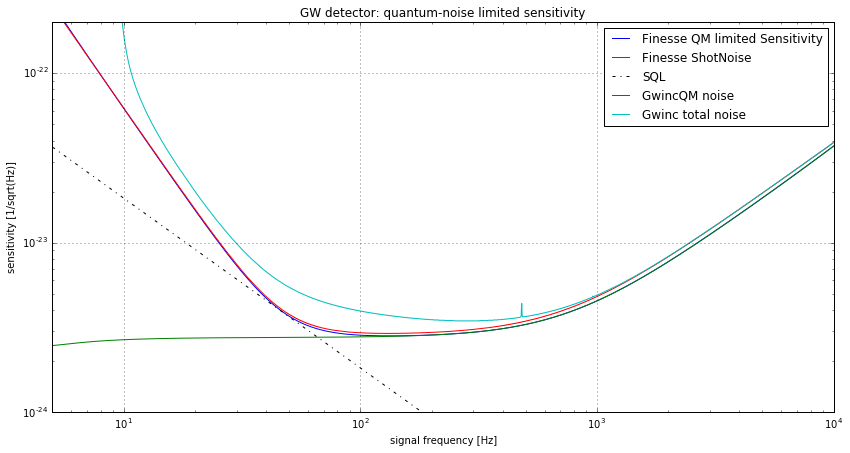

In [44]:
plt.figure(figsize=(14,7))
plt.loglog(out.x,out['NSR_with_RP'], label='Finesse QM limited Sensitivity')
plt.loglog(out.x,out['NSR_without_RP'],label='Finesse ShotNoise')
plt.loglog(out.x,SQL_x,'-.',color='k', label='SQL')
#plt.loglog(out.x,out['power'],label='Power on PD')
#plt.loglog(out.x,out['sense'],label='Finesse Total')
plt.loglog(Freq,Quantum,label='GwincQM noise')
plt.loglog(Freq,Total,label='Gwinc total noise')
plt.title('GW detector: quantum-noise limited sensitivity')
plt.xlabel('signal frequency [Hz]')
plt.xlim([min(out.x),max(out.x)])
plt.ylim([1E-24,2E-22])
plt.legend()
plt.ylabel('sensitivity [1/sqrt(Hz)]')
plt.grid(True)

plt.show()

In [45]:
kat.verbose = False

#basekat.parseCommands("""
#sq sq1 0 10 40 nOMCout # 10 db of squeezing
#""")

basekat.undumpNodes()
kat=basekat.deepcopy()

kat.L0.P = 25
out1 = kat.run()
kat.L0.P = 125
out2 = kat.run()
kat.L0.P = 500
out3 = kat.run()

--------------------------------------------------------------
Running kat - Started at 2016-05-16 09:24:46.537317


100% | ETA:  0:00:00 | Calculating                                             


Finished in 57.8617 seconds
--------------------------------------------------------------
Running kat - Started at 2016-05-16 09:25:44.399653


100% | ETA:  0:00:00 | Calculating                                             


Finished in 60.8261 seconds
--------------------------------------------------------------
Running kat - Started at 2016-05-16 09:26:45.226019


 95% | ETA:  0:00:02 | Calculating                                             


Finished in 61.6049 seconds


100% | ETA:  0:00:00 | Calculating                                             

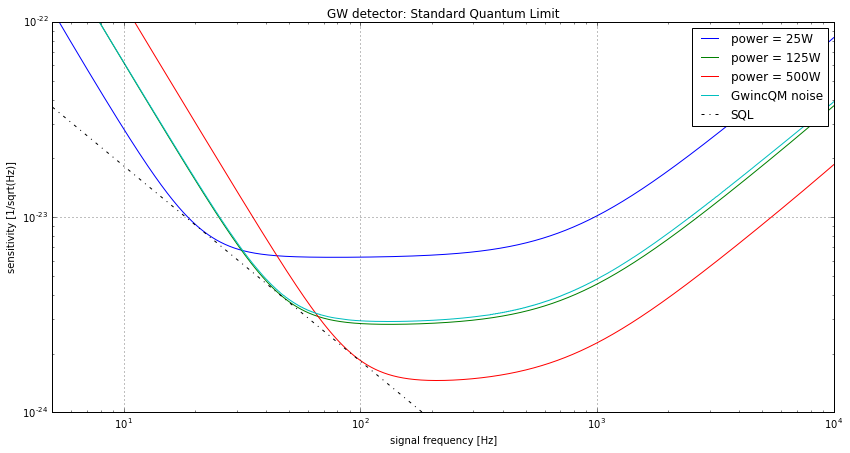

In [46]:
plt.figure(figsize=(14,7))
plt.loglog(out1.x,out1['NSR_with_RP'], label='power = 25W')
plt.loglog(out2.x,out2['NSR_with_RP'], label='power = 125W')
plt.loglog(out3.x,out3['NSR_with_RP'], label='power = 500W')
plt.loglog(Freq,Quantum,label='GwincQM noise')
plt.loglog(out3.x,SQL_x,'-.',color='k', label='SQL')
plt.title('GW detector: Standard Quantum Limit')
plt.xlabel('signal frequency [Hz]')
plt.xlim([min(out1.x),max(out1.x)])
plt.ylim([1e-24,1e-22])
plt.legend()
plt.ylabel('sensitivity [1/sqrt(Hz)]')
plt.grid(True)